In [1]:
import pandas as pd
#Google colab does not have pickle
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import seaborn as sns

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D,Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding,Concatenate
from keras.models import Model
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 12.8MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219230 sha256=3af1908d5bb13a7e642a2716a6dffe8c921cbcf8f2a2c85bcc9a98f942a0159e
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(3)

print('The data used will be:')
df_train

The data used will be:


,Human,Yersinia,Joined,label
0,"[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ...","[MAK, AKA, KAS, ASR, SRH, RHN, HNL, NLS, LSI, ...","[MKD, KDK, DKQ, KQK, QKK, KKK, KKK, KKE, KER, ...",1
1,"[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ...","[MQH, QHV, HVT, VTG, TGS, GSK, SKR, KRR, RRL, ...","[MSW, SWS, WSG, SGL, GLL, LLH, LHG, HGL, GLN, ...",0
2,"[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ...","[MAE, AEL, ELP, LPA, PAK, AKR, KRR, RRF, RFT, ...","[MSL, SLF, LFD, FDL, DLF, LFR, FRG, RGF, GFF, ...",1
3,"[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ...","[MRI, RIF, IFA, FAI, AIS, ISC, SCS, CSS, SSY, ...","[MAV, AVA, VAP, APR, PRL, RLF, LFG, FGG, GGL, ...",0
4,"[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ...","[MSY, SYA, YAF, AFP, FPG, PGT, GTF, TFP, FPG, ...","[MST, STI, TIQ, IQS, QSE, SET, ETD, TDC, DCY, ...",0
...,...,...,...,...
6265,"[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ...","[MIT, ITT, TTD, TDG, DGN, GNS, NSA, SAV, AVA, ...","[MSY, SYF, YFG, FGE, GEH, EHF, HFW, FWG, WGE, ...",1
6266,"[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ...","[MSQ, SQP, QPP, PPF, PFW, FWQ, WQQ, QQK, QKT, ...","[MTV, TVG, VGK, GKS, KSS, SSK, SKM, KML, MLQ, ...",1
6267,"[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ...","[MSE, SED, EDR, DRH, RHQ, HQQ, QQR, QRQ, RQQ, ...","[MNN, NNL, NLS, LSF, SFS, FSE, SEL, ELC, LCC, ...",0
6268,"[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ...","[MKN, KNL, NLS, LSF, SFV, FVA, VAG, AGL, GLV, ...","[MAP, APE, PEI, EIN, INL, NLP, LPG, PGP, GPM, ...",1


Median length of Human sequence is 477


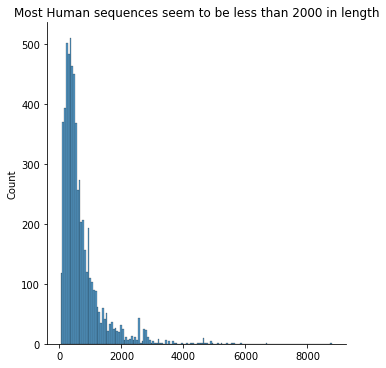

In [ ]:
lengths = sorted(len(s) for s in df_train['Human'])
print("Median length of Human sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Human sequences seem to be less than 2000 in length")

Median length of Yersinia sequence is 334


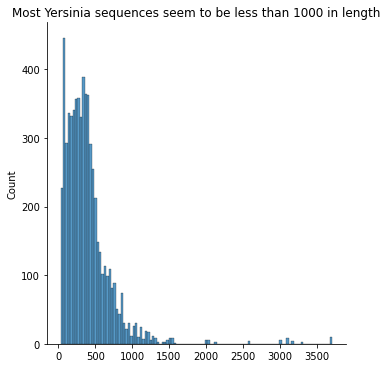

In [ ]:
lengths = sorted(len(s) for s in df_train['Yersinia'])
print("Median length of Yersinia sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Yersinia sequences seem to be less than 1000 in length")

Median length of Joined sequence is 877


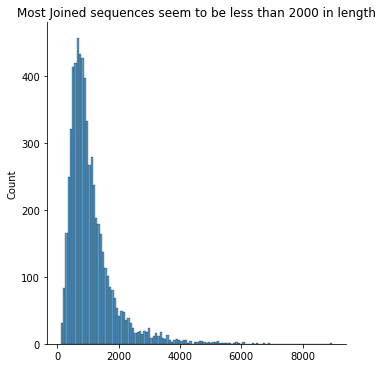

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 5000
MAX_SEQUENCE_LENGTH is 1500
max sequences1_train length: 7863
min sequences1_train length: 36
median sequences1_train length: 421


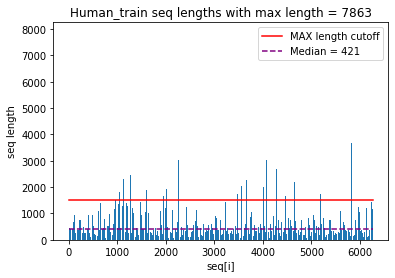

max word index sequences1_train: 4999
max sequences2_train length: 3622
min sequences2_train length: 24
median sequences2_train length: 301


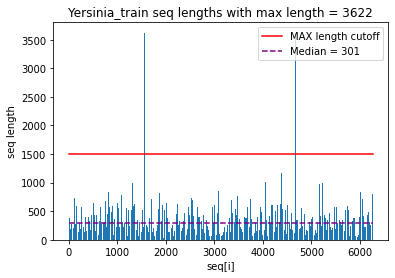

max word index sequences2_train: 4999
Found 8000 unique tokens in tokenizer1.
Found 7998 unique tokens in tokenizer2.
pre padding
Shape of data1 tensor: (6270, 1500)
Shape of data2 tensor: (6270, 1500)
max test_sequences1 length: 5128
min test_sequences1 length: 36
median test_sequences1 length: 433


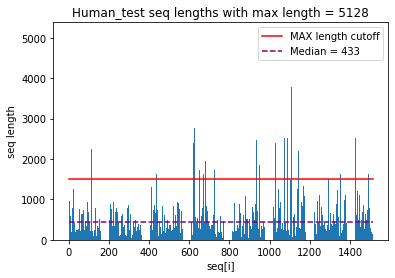

max test_sequences2 length: 3622
min test_sequences2 length: 23
median test_sequences2 length: 298


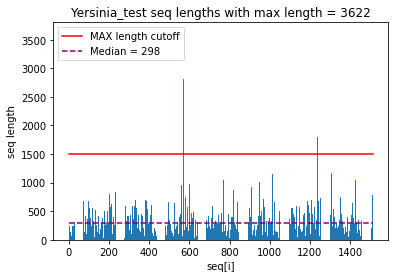

pre padding for test seq.
Shape of test_data1 tensor: (1514, 1500)
Shape of test_data2 tensor: (1514, 1500)
num_words is 5000


In [12]:
data1_3D_doubleip,data2_3D_doubleip,data1_test_3D_doubleip,data2_test_3D_doubleip,num_words_3D,MAX_SEQUENCE_LENGTH_3D_dIP,MAX_VOCAB_SIZE_3D = f.get_seq_data_doubleip(5000,1500,df_train,df_test,pad='pre', show=True)

MAX_VOCAB_SIZE is 5000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 7989
min sequence_data length: 83
median sequence_data length: 775


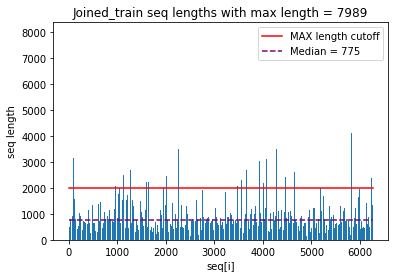

max word index: 4999
Found 8000 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 5409
min sequences_test length: 116
median sequences_test length: 796


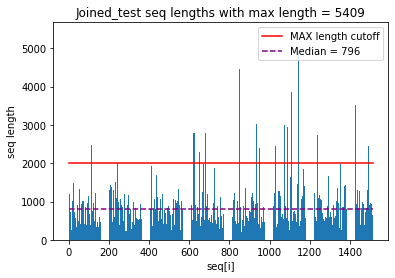

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 5000


In [13]:
data_3D_join,data_test_3D_join,num_words_3D,MAX_SEQUENCE_LENGTH_3D_J,MAX_VOCAB_SIZE_3D = f.get_seq_data_join(5000,2000,df_train,df_test,pad='pre', show=True)

In [11]:
EMBEDDING_DIM_3D = 5
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
DROP = 0.5

x1_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_3D_dIP,EMBEDDING_DIM_3D,num_words_3D,DROP)
x2_doubleip = f.conv_model(MAX_SEQUENCE_LENGTH_3D_dIP,EMBEDDING_DIM_3D,num_words_3D,DROP)

x1_join = f.conv_model(MAX_SEQUENCE_LENGTH_3D_J,EMBEDDING_DIM_3D,num_words_3D,DROP)

concatenator = Concatenate(axis=1)
x = concatenator([x1_join.output, x1_doubleip.output, x2_doubleip.output])
x = Dense(128)(x)
x = Dropout(0.3)(x)

output = Dense(1, activation="sigmoid",name="Final")(x)
model3D_CNN_combine = Model(inputs=[x1_join.input, x1_doubleip.input, x2_doubleip.input,], outputs=output)
model3D_CNN_combine.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model3D_CNN_combine.fit([data_3D_join,data1_3D_doubleip,data2_3D_doubleip], df_train['label'].values, epochs=EPOCHS,batch_size=BATCH_SIZE, validation_data = ([data_test_3D_join,data1_test_3D_doubleip,data2_test_3D_doubleip],df_test['label'].values))
print(roc_auc_score(df_test['label'].values, model3D_CNN_combine.predict([data_test_3D_join,data1_test_3D_doubleip,data2_test_3D_doubleip])))

Epoch 1/10
49/49 [==============================] - 3s 39ms/step - loss: 0.6508 - accuracy: 0.6012 - val_loss: 0.5903 - val_accuracy: 0.7008
Epoch 2/10
49/49 [==============================] - 2s 33ms/step - loss: 0.5692 - accuracy: 0.7044 - val_loss: 0.5409 - val_accuracy: 0.7266
Epoch 3/10
49/49 [==============================] - 2s 33ms/step - loss: 0.4264 - accuracy: 0.8029 - val_loss: 0.4625 - val_accuracy: 0.7992
Epoch 4/10
49/49 [==============================] - 2s 33ms/step - loss: 0.2652 - accuracy: 0.8927 - val_loss: 0.4675 - val_accuracy: 0.8038
Epoch 5/10
49/49 [==============================] - 2s 33ms/step - loss: 0.1808 - accuracy: 0.9285 - val_loss: 0.4915 - val_accuracy: 0.7933
Epoch 6/10
49/49 [==============================] - 2s 33ms/step - loss: 0.1219 - accuracy: 0.9568 - val_loss: 0.5522 - val_accuracy: 0.8018
Epoch 7/10
49/49 [==============================] - 2s 33ms/step - loss: 0.0949 - accuracy: 0.9641 - val_loss: 0.5530 - val_accuracy: 0.8111
Epoch 8/10
49